In [1]:
import meep as mp
import numpy
import matplotlib.pyplot as plt

res = 50        # pixels/μm
three_d = False # 3d calculation?
d = 0.12        # branch separation

gdsII_file = 'coupler.gds'
CELL_LAYER = 0
PORT1_LAYER = 1
PORT2_LAYER = 2
PORT3_LAYER = 3
PORT4_LAYER = 4
SOURCE_LAYER = 5
UPPER_BRANCH_LAYER = 31
LOWER_BRANCH_LAYER = 32
default_d = 0.3

t_oxide = 1.0
t_Si = 0.22
t_air = 0.78

dpml = 1
cell_thickness = dpml+t_oxide+t_Si+t_air+dpml
si_zmin = 0

oxide = mp.Medium(epsilon=2.25)
silicon=mp.Medium(epsilon=12)

lcen = 1.55
fcen = 1/lcen
df = 0.2*fcen

cell_zmax = 0.5*cell_thickness if three_d else 0
cell_zmin = -0.5*cell_thickness if three_d else 0
si_zmax = t_Si if three_d else 0

# read cell size, volumes for source region and flux monitors,
# and coupler geometry from GDSII file
upper_branch = mp.get_GDSII_prisms(silicon, gdsII_file, UPPER_BRANCH_LAYER, si_zmin, si_zmax)
lower_branch = mp.get_GDSII_prisms(silicon, gdsII_file, LOWER_BRANCH_LAYER, si_zmin, si_zmax)

cell = mp.GDSII_vol(gdsII_file, CELL_LAYER, cell_zmin, cell_zmax)
p1 = mp.GDSII_vol(gdsII_file, PORT1_LAYER, si_zmin, si_zmax)
p2 = mp.GDSII_vol(gdsII_file, PORT2_LAYER, si_zmin, si_zmax)
p3 = mp.GDSII_vol(gdsII_file, PORT3_LAYER, si_zmin, si_zmax)
p4 = mp.GDSII_vol(gdsII_file, PORT4_LAYER, si_zmin, si_zmax)
src_vol = mp.GDSII_vol(gdsII_file, SOURCE_LAYER, si_zmin, si_zmax)

# displace upper and lower branches of coupler (as well as source and flux regions)
if d != default_d:
    delta_y = 0.5*(d-default_d)
    delta = mp.Vector3(y=delta_y)
    p1.center += delta
    p2.center -= delta
    p3.center += delta
    p4.center -= delta
    src_vol.center += delta
    cell.size += 2*delta
    for np in range(len(lower_branch)):
        lower_branch[np].center -= delta
        for nv in range(len(lower_branch[np].vertices)):
            lower_branch[np].vertices[nv] -= delta
    for np in range(len(upper_branch)):
        upper_branch[np].center += delta
        for nv in range(len(upper_branch[np].vertices)):
            upper_branch[np].vertices[nv] += delta

geometry = upper_branch+lower_branch

if three_d:
    oxide_center = mp.Vector3(z=-0.5*t_oxide)
    oxide_size = mp.Vector3(cell.size.x,cell.size.y,t_oxide)
    oxide_layer = [mp.Block(material=oxide, center=oxide_center, size=oxide_size)]
    geometry = geometry+oxide_layer

sources = [mp.EigenModeSource(src=mp.GaussianSource(fcen,fwidth=df),
                              size=src_vol.size,
                              center=src_vol.center,
                              eig_band=1,
                              eig_parity=mp.NO_PARITY if three_d else mp.EVEN_Y+mp.ODD_Z,
                              eig_match_freq=True)]

sim = mp.Simulation(resolution=res,
                    cell_size=cell.size,
                    boundary_layers=[mp.PML(dpml)],
                    sources=sources,
                    geometry=geometry)

mode1 = sim.add_mode_monitor(fcen, 0, 1, mp.ModeRegion(volume=p1))
mode2 = sim.add_mode_monitor(fcen, 0, 1, mp.ModeRegion(volume=p2))
mode3 = sim.add_mode_monitor(fcen, 0, 1, mp.ModeRegion(volume=p3))
mode4 = sim.add_mode_monitor(fcen, 0, 1, mp.ModeRegion(volume=p4))

sim.run(until_after_sources=100)

-----------
Initializing structure...
Working in 2D dimensions.
Computational cell is 34.4 x 7.82 x 0 with resolution 50
     prism, center = (-9.09425,1.32149,0)
          height 0, axis (0,0,1), 174 vertices:
          (-4,0.06,0)
          (-4.108,0.061,0)
          (-4.215,0.062,0)
          (-4.322,0.065,0)
          (-4.429,0.07,0)
          (-4.535,0.075,0)
          (-4.641,0.081,0)
          (-4.747,0.089,0)
          (-4.852,0.097,0)
          (-5.062,0.117,0)
          (-5.167,0.129,0)
          (-5.271,0.141,0)
          (-5.479,0.169,0)
          (-5.582,0.184,0)
          (-5.685,0.2,0)
          (-5.788,0.217,0)
          (-5.891,0.235,0)
          (-5.993,0.253,0)
          (-6.095,0.272,0)
          (-6.197,0.292,0)
          (-6.299,0.313,0)
          (-6.4,0.334,0)
          (-6.501,0.356,0)
          (-6.703,0.402,0)
          (-6.803,0.425,0)
          (-6.904,0.45,0)
          (-7.204,0.525,0)
          (-7.303,0.552,0)
          (-7.403,0.578,0)
          (-7.502

subpixel-averaging is 11.5011% done, 30.9631 s remaining
subpixel-averaging is 20.4466% done, 15.8135 s remaining
subpixel-averaging is 29.3921% done, 9.71826 s remaining
subpixel-averaging is 58.5715% done, 2.83111 s remaining
subpixel-averaging is 71.3508% done, 1.62492 s remaining
subpixel-averaging is 80.2963% done, 0.998215 s remaining
subpixel-averaging is 89.2418% done, 0.492406 s remaining
subpixel-averaging is 11.5011% done, 30.9076 s remaining
subpixel-averaging is 20.4466% done, 15.9068 s remaining
subpixel-averaging is 29.3921% done, 9.80747 s remaining
subpixel-averaging is 57.7195% done, 2.9313 s remaining
subpixel-averaging is 71.1378% done, 1.66162 s remaining
subpixel-averaging is 80.0833% done, 1.0166 s remaining
subpixel-averaging is 88.8158% done, 0.504616 s remaining
subpixel-averaging is 11.5011% done, 30.9943 s remaining
subpixel-averaging is 20.4466% done, 15.8803 s remaining
subpixel-averaging is 29.3921% done, 9.78632 s remaining
subpixel-averaging is 56.8676%

In [2]:
# S parameters
p1_coeff = sim.get_eigenmode_coefficients(mode1, [1], eig_parity=mp.NO_PARITY if three_d else mp.EVEN_Y+mp.ODD_Z).alpha[0,0,0]
p2_coeff = sim.get_eigenmode_coefficients(mode2, [1], eig_parity=mp.NO_PARITY if three_d else mp.EVEN_Y+mp.ODD_Z).alpha[0,0,1]
p3_coeff = sim.get_eigenmode_coefficients(mode3, [1], eig_parity=mp.NO_PARITY if three_d else mp.EVEN_Y+mp.ODD_Z).alpha[0,0,0]
p4_coeff = sim.get_eigenmode_coefficients(mode4, [1], eig_parity=mp.NO_PARITY if three_d else mp.EVEN_Y+mp.ODD_Z).alpha[0,0,0]

# transmittance
p2_trans = abs(p2_coeff)**2/abs(p1_coeff)**2
p3_trans = abs(p3_coeff)**2/abs(p1_coeff)**2
p4_trans = abs(p4_coeff)**2/abs(p1_coeff)**2

print("trans:, {:.2f}, {:.6f}, {:.6f}, {:.6f}".format(d,p2_trans,p3_trans,p4_trans))

MPB solved for omega_1(2.2349,0,0) = 0.686107 after 12 iters
MPB solved for omega_1(2.08827,0,0) = 0.645201 after 7 iters
MPB solved for omega_1(2.08812,0,0) = 0.645161 after 4 iters
MPB solved for omega_1(2.08812,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.088124,-0.000000,0.000000)
MPB solved for omega_1(2.2349,0,0) = 0.686107 after 12 iters
MPB solved for omega_1(2.08827,0,0) = 0.645201 after 7 iters
MPB solved for omega_1(2.08812,0,0) = 0.645161 after 4 iters
MPB solved for omega_1(2.08812,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.088124,-0.000000,0.000000)
MPB solved for omega_1(2.2349,0,0) = 0.686107 after 13 iters
MPB solved for omega_1(2.08827,0,0) = 0.645201 after 7 iters
MPB solved for omega_1(2.08812,0,0) = 0.645161 after 4 iters
MPB solved for omega_1(2.08812,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.088124,-0.000000,0.000000)
MPB solved for omega_1(2.2349,0,0) = 0.686107 after 14 iters
MPB solved for omega_1(2

In [3]:
sim.reset_meep()

sources = [mp.EigenModeSource(src=mp.ContinuousSource(fcen,fwidth=df),
                              size=src_vol.size,
                              center=src_vol.center,
                              eig_band=1,
                              eig_parity=mp.EVEN_Y+mp.ODD_Z,
                              eig_match_freq=True)]

sim = mp.Simulation(resolution=res,
                    cell_size=cell.size,
                    boundary_layers=[mp.PML(dpml)],
                    sources=sources,
                    geometry=geometry)

sim.run(until=400)  # arbitrary long run time to ensure that fields have reached steady state


Field time usage:
        connecting chunks: 0.149937 s
            time stepping: 116.36 s
            communicating: 8.63537 s
     Fourier transforming: 0.747245 s
                      MPB: 0.0412967 s
          everything else: 0.820934 s

-----------
Initializing structure...
Working in 2D dimensions.
Computational cell is 34.4 x 7.82 x 0 with resolution 50
     prism, center = (-9.09425,1.32149,0)
          height 0, axis (0,0,1), 174 vertices:
          (-4,0.06,0)
          (-4.108,0.061,0)
          (-4.215,0.062,0)
          (-4.322,0.065,0)
          (-4.429,0.07,0)
          (-4.535,0.075,0)
          (-4.641,0.081,0)
          (-4.747,0.089,0)
          (-4.852,0.097,0)
          (-5.062,0.117,0)
          (-5.167,0.129,0)
          (-5.271,0.141,0)
          (-5.479,0.169,0)
          (-5.582,0.184,0)
          (-5.685,0.2,0)
          (-5.788,0.217,0)
          (-5.891,0.235,0)
          (-5.993,0.253,0)
          (-6.095,0.272,0)
          (-6.197,0.292,0)
          (

subpixel-averaging is 11.5011% done, 30.8183 s remaining
subpixel-averaging is 20.4466% done, 15.7497 s remaining
subpixel-averaging is 29.6051% done, 9.5833 s remaining
subpixel-averaging is 61.1273% done, 2.54648 s remaining
subpixel-averaging is 71.3508% done, 1.63014 s remaining
subpixel-averaging is 80.2963% done, 0.999069 s remaining
subpixel-averaging is 89.2418% done, 0.489546 s remaining
subpixel-averaging is 11.5011% done, 30.8424 s remaining
subpixel-averaging is 20.4466% done, 15.9006 s remaining
subpixel-averaging is 29.3921% done, 9.75747 s remaining
subpixel-averaging is 57.9325% done, 2.90513 s remaining
subpixel-averaging is 71.1378% done, 1.65849 s remaining
subpixel-averaging is 80.0833% done, 1.01553 s remaining
subpixel-averaging is 88.8158% done, 0.504138 s remaining
subpixel-averaging is 11.5011% done, 30.9702 s remaining
subpixel-averaging is 20.4466% done, 15.7172 s remaining
subpixel-averaging is 29.3921% done, 9.76 s remaining
subpixel-averaging is 57.9325% d

Meep progress: 330.76/400.0 = 82.7% done in 236.2s, 49.4s to go
on time step 33076 (time=330.76), 0.00694491 s/step
Meep progress: 336.46/400.0 = 84.1% done in 240.2s, 45.4s to go
on time step 33646 (time=336.46), 0.00702158 s/step
Meep progress: 342.17/400.0 = 85.5% done in 244.2s, 41.3s to go
on time step 34217 (time=342.17), 0.0070114 s/step
Meep progress: 347.92/400.0 = 87.0% done in 248.2s, 37.2s to go
on time step 34792 (time=347.92), 0.00696299 s/step
Meep progress: 353.64/400.0 = 88.4% done in 252.2s, 33.1s to go
on time step 35364 (time=353.64), 0.00699623 s/step
Meep progress: 359.28000000000003/400.0 = 89.8% done in 256.2s, 29.0s to go
on time step 35928 (time=359.28), 0.00710347 s/step
Meep progress: 365.03000000000003/400.0 = 91.3% done in 260.2s, 24.9s to go
on time step 36503 (time=365.03), 0.00696683 s/step
Meep progress: 370.73/400.0 = 92.7% done in 264.2s, 20.9s to go
on time step 37073 (time=370.73), 0.00701992 s/step
Meep progress: 376.49/400.0 = 94.1% done in 268.2

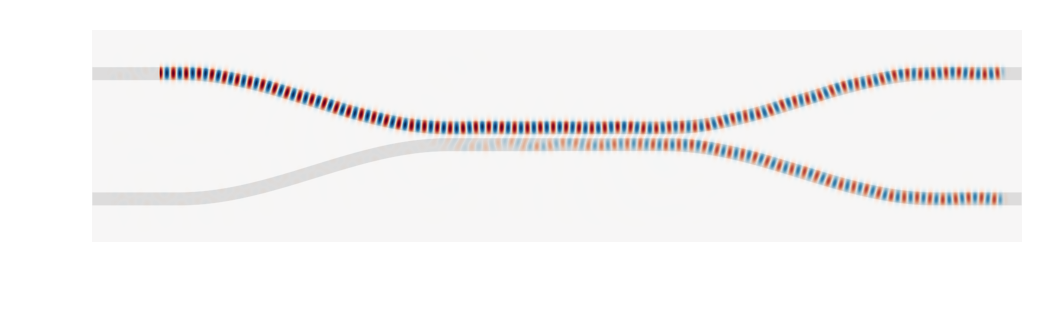

In [4]:
eps_data = sim.get_epsilon()
ez_data = numpy.real(sim.get_efield_z())

plt.figure(dpi=200)
plt.imshow(numpy.transpose(eps_data), interpolation='spline36', cmap='binary')
plt.imshow(numpy.flipud(numpy.transpose(ez_data)), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()